<a href="https://colab.research.google.com/github/ashrafabuareesh/Homes-in-Ames/blob/main/processed_Ames_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import The Necessary Packages.

In [ ]:


# Import standard packages
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')




In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the Data.

In [ ]:
# Load the Data.

# Load Ames for ML

fpath ="/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df = df.set_index("PID")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0


# Explore and Clean the Data.

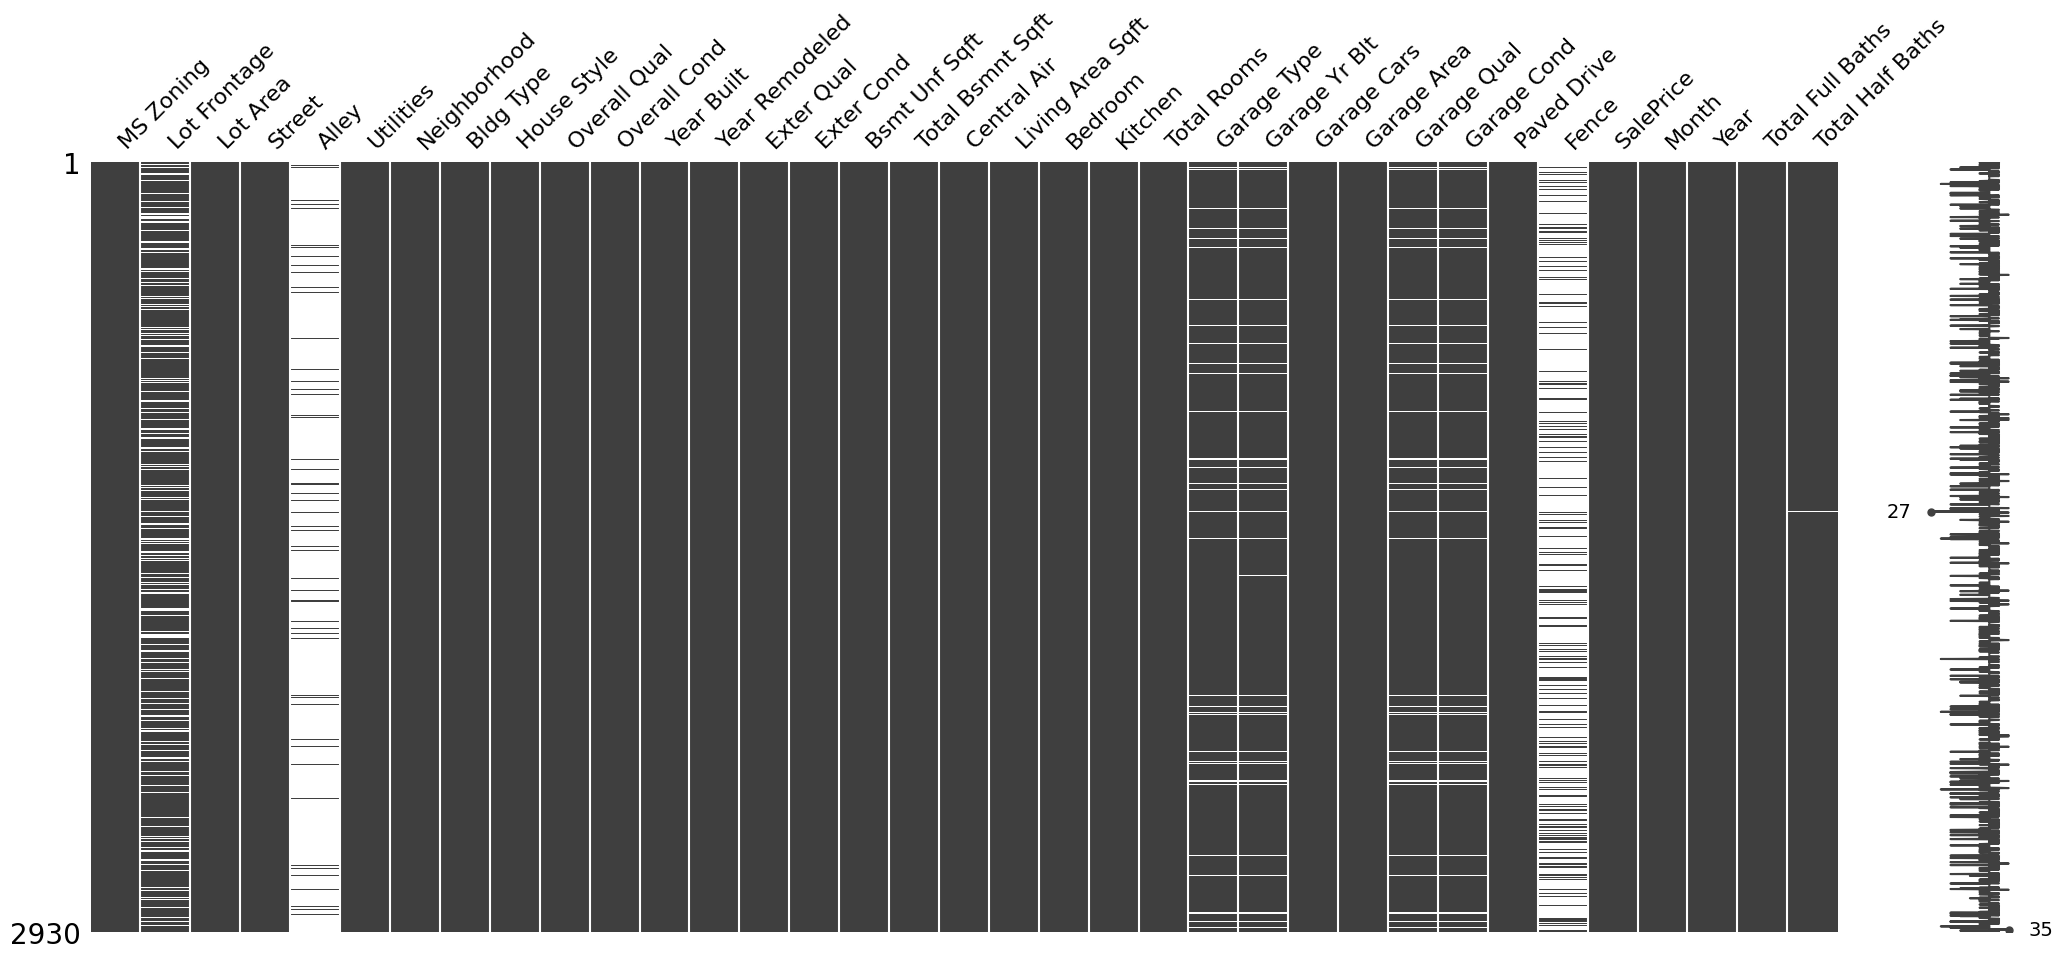

In [ ]:
# Visualize null values
msno.matrix(df);


# Validation Split

In [ ]:
# Separate features vs target & train/test split
drop_from_model = ['Utilities', # Quasi-constant
                   "Street", # Quasi-constant
                   'MS Zoning', # Stakeholder can't change
                   'Lot Frontage',  # Stakeholder can't change
                   'Lot Area', # Stakeholder can't change
                   'Neighborhood',  # Stakeholder can't change
                   'Year Built'] # Stakeholder can't change
X = df.drop(columns = [*drop_from_model,'SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()



,Alley,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,NaN,1Fam,1Story,4,5,1994,TA,TA,0.0,0.0,N,943.0,3,1,5,Detchd,1958.0,1.0,308.0,TA,TA,N,NaN,8,2007,1.0,0.0
909254010,NaN,1Fam,2Story,7,8,1990,TA,TA,600.0,600.0,Y,1228.0,3,1,6,Detchd,1918.0,1.0,215.0,Fa,TA,Y,MnPrv,5,2009,1.0,0.0
531450090,NaN,1Fam,1Story,6,5,1991,TA,TA,78.0,1278.0,Y,1294.0,3,1,6,Attchd,1991.0,2.0,496.0,TA,TA,Y,GdWo,6,2008,3.0,0.0
903400040,Pave,1Fam,2Story,6,6,1950,TA,TA,764.0,764.0,Y,1824.0,3,1,8,Detchd,1940.0,2.0,520.0,TA,TA,N,GdPrv,7,2007,1.0,0.0
527107130,NaN,1Fam,SLvl,7,5,1997,TA,TA,100.0,384.0,Y,1628.0,3,1,7,BuiltIn,1996.0,2.0,390.0,TA,TA,Y,NaN,6,2009,2.0,1.0


# Preprocess the Data





In [ ]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)



Numeric Columns: Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths', 'Total Half Baths'],
      dtype='object')


In [ ]:
## PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Exter Qual','Exter Cond', 'Garage Qual',"Garage Cond"]
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order, qual_cond_order,
                           qual_cond_order, qual_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
## Making an ordinal_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ord_tuple = ('ordinal', ord_pipe, ord_cols)



Ordinal Columns: ['Exter Qual', 'Exter Cond', 'Garage Qual', 'Garage Cond']


In [ ]:
## PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)



OneHotEncoder Columns: Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object')


In [ ]:
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# fit the column transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)


In [ ]:
#Instantiate and Fit the Model.
from sklearn.linear_model import LinearRegression
# Instantiate model
lin_reg = LinearRegression()
#Fit model
lin_reg.fit(X_train_tf, y_train)


LinearRegression()

In [ ]:
#Get Predictions from the Model for Training and Testing Data.
#Get predictions for training and test data
y_pred_train = lin_reg.predict(X_train_tf)
y_pred_test = lin_reg.predict(X_test_tf)


In [ ]:
# Calculating MAE with sklearn
from sklearn.metrics import mean_absolute_error
train_MAE = mean_absolute_error(y_train, y_pred_train)
test_MAE = mean_absolute_error(y_test, y_pred_test)
print(f'Model Training MAE: {train_MAE:,.2f}')
print(f'Model Testing MAE: {test_MAE:,.2f}')


Model Training MAE: 21,158.21
Model Testing MAE: 19,928.76


In [ ]:
# Calculating MSE with sklearn
from sklearn.metrics import mean_squared_error
train_MSE = mean_squared_error(y_train, y_pred_train)
test_MSE = mean_squared_error(y_test, y_pred_test)
print(f'Model Training MSE: {train_MSE:,.2f}')
print(f'Model Testing MSE: {test_MSE:,.2f}')


Model Training MSE: 1,151,857,608.08
Model Testing MSE: 850,685,987.08


In [ ]:
# Calculating RMSE with numpy
from sklearn.metrics import mean_squared_error
train_RMSE = mean_squared_error(y_train, y_pred_train , squared=False)
test_RMSE = mean_squared_error(y_test, y_pred_test , squared=False)
print(f'Model Training MSE: {train_RMSE:,.2f}')
print(f'Model Testing MSE: {test_RMSE:,.2f}')

Model Training MSE: 33,939.03
Model Testing MSE: 29,166.52


In [ ]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f'Model Training R2: {train_r2:.2f}')
print(f'Model Testing R2: {test_r2:.2f}')


Model Training R2: 0.83
Model Testing R2: 0.83


In [ ]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics





In [ ]:
regression_metrics(y_test, y_pred_test, label="data test",output_dict=True)


------------------------------------------------------------
Regression Metrics: data test
------------------------------------------------------------
- MAE = 19,928.762
- MSE = 850,685,987.084
- RMSE = 29,166.522
- R^2 = 0.826


{'Label': 'data test',
 'MAE': 19928.76248723388,
 'MSE': 850685987.0842248,
 'RMSE': 29166.52168298827,
 'R^2': 0.826289218118759}

In [ ]:
regression_metrics(y_train , y_pred_train , label= "Data train")

------------------------------------------------------------
Regression Metrics: Data train
------------------------------------------------------------
- MAE = 21,158.209
- MSE = 1,151,857,608.078
- RMSE = 33,939.028
- R^2 = 0.832


In [ ]:

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)




In [ ]:
evaluate_regression (lin_reg ,X_train_tf , y_train , X_test_tf , y_test, output_frame=True )

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 21,158.209
- MSE = 1,151,857,608.078
- RMSE = 33,939.028
- R^2 = 0.832

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 19,928.762
- MSE = 850,685,987.084
- RMSE = 29,166.522
- R^2 = 0.826


,MAE,MSE,RMSE,R^2
Training Data,21158.209,1.151858e+09,33939.028,0.832
Test Data,19928.762,8.506860e+08,29166.522,0.826




# Regression Trees

In [ ]:
dec_tree= DecisionTreeRegressor(random_state=42)

In [ ]:
dec_tree . fit(X_train_tf , y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions for training and testing data
train_preds = dec_tree.predict(X_train_tf)
test_preds = dec_tree.predict(X_test_tf)




array([ 80000., 137000., 179200., ..., 184000., 112500., 140000.])

In [ ]:
# Evaluate the model
train_r2_score = r2_score(y_train, train_preds)
test_r2_score = r2_score(y_test, test_preds)
# Print the results
print (f'Training R2 is {train_r2_score:.3f}.')
print (f'Testing R2 is {test_r2_score:.3f}.')



Training R2 is 1.000.
Testing R2 is 0.667.


- This model is overfitting. It performs well (perfectly) on the training data but does poorly on the testing data.

In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()



{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.get_depth()

27

In [ ]:
# List of values to try for max_depth:
depths = list(range(2, 27)) # will try every value between 2 and 27
# list to collect the results of each depth
scores_list = []
# Loop through depths
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_tf, y_train)
    # Get predictions
    train_preds = dec_tree.predict(X_train_tf)
    test_preds = dec_tree.predict(X_test_tf)
    # Calculate score
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    # Add dictionray of scores to score_list
    results = {'max_depth':depth,
               'Train R2':train_r2,
               'Test R2':test_r2}
    scores_list.append(results)
    # Print the results
    print(f'When max_depth is {depth},')
    print(f'- the training R2 is {train_r2:.3f}.')
    print(f'- the testing R2 is {test_r2:.3f}.')
    print()



When max_depth is 2,
- the training R2 is 0.660.
- the testing R2 is 0.578.

When max_depth is 3,
- the training R2 is 0.750.
- the testing R2 is 0.670.

When max_depth is 4,
- the training R2 is 0.814.
- the testing R2 is 0.727.

When max_depth is 5,
- the training R2 is 0.861.
- the testing R2 is 0.695.

When max_depth is 6,
- the training R2 is 0.894.
- the testing R2 is 0.699.

When max_depth is 7,
- the training R2 is 0.922.
- the testing R2 is 0.695.

When max_depth is 8,
- the training R2 is 0.945.
- the testing R2 is 0.707.

When max_depth is 9,
- the training R2 is 0.963.
- the testing R2 is 0.704.

When max_depth is 10,
- the training R2 is 0.975.
- the testing R2 is 0.676.

When max_depth is 11,
- the training R2 is 0.984.
- the testing R2 is 0.687.

When max_depth is 12,
- the training R2 is 0.990.
- the testing R2 is 0.674.

When max_depth is 13,
- the training R2 is 0.993.
- the testing R2 is 0.670.

When max_depth is 14,
- the training R2 is 0.995.
- the testing R2 is 0.

In [ ]:
# Create a dataframe from the scores_list
scores = pd.DataFrame(scores_list)
# Set the max_depth as the index
scores = scores.set_index('max_depth')
scores.head(26)



,Train R2,Test R2
max_depth,,
2,0.659758,0.577829
3,0.749603,0.670419
4,0.813764,0.727450
5,0.860900,0.695466
6,0.894339,0.699080
7,0.922196,0.694721
8,0.944933,0.707141
9,0.963094,0.704488
10,0.975305,0.675921


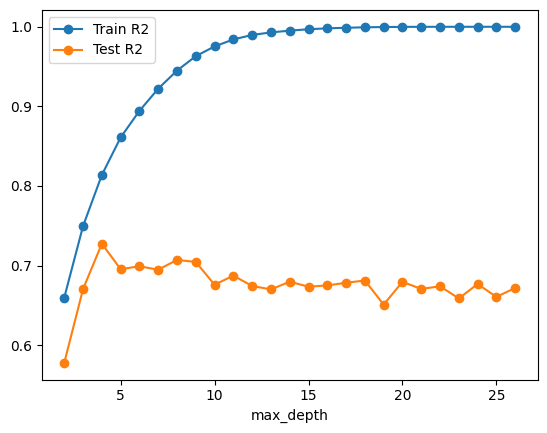

In [ ]:
# Plot the results for the train and test data
ax = scores.plot(marker='o')
ax.legend();



In [ ]:
# Sort by best result on the test data
sorted_scores = scores.sort_values(by='Test R2', ascending=False)
sorted_scores.head()



,Train R2,Test R2
max_depth,,
4,0.813764,0.727450
8,0.944933,0.707141
9,0.963094,0.704488
6,0.894339,0.699080
5,0.860900,0.695466
